<a href="https://colab.research.google.com/github/shubhangibarua/Machine-Learning-Project-Red-Wine-/blob/main/ML_Project__Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/drive/u/0/folders/13w0gfMRnjC2ix8wz9WIpjsAMrzVU4LPR

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

import tensorflow as tf

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "winequality-red.csv" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving winequality-red.csv to winequality-red (1).csv
User uploaded file "winequality-red.csv" with length 85743 bytes


LOADING THE DATA

In [ ]:
wine_qr=pd.read_csv('winequality-red.csv')

In [ ]:
wine_qr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_qr.shape

(1599, 12)

In [ ]:
wine_qr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in our dataset

In [ ]:
wine_qr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_qr.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
wine_qr.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_qr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_qr.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

EXPLORATORY DATA ANALYSIS

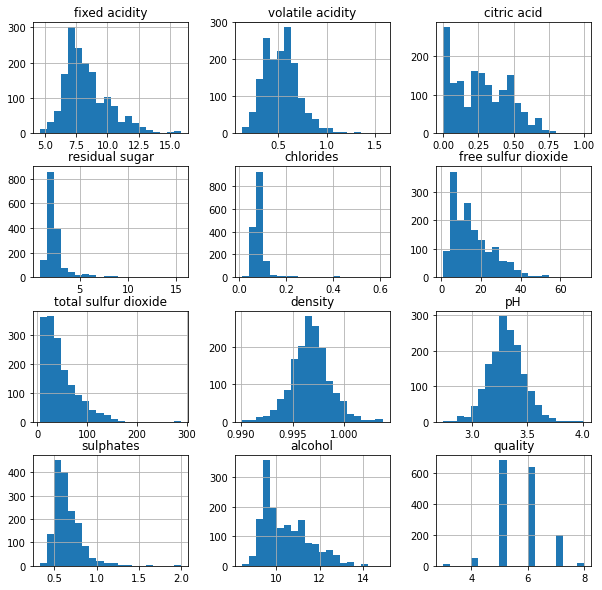

In [ ]:
# histogram to visualise the distribution of different variables in the dataset.
wine_qr.hist(bins=20, figsize=(10, 10))
plt.show()

In [ ]:
wine_qr.describe()[['quality']]

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


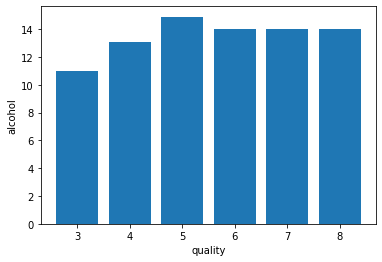

In [ ]:
plt.bar(wine_qr['quality'], wine_qr['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<AxesSubplot:ylabel='Density'>

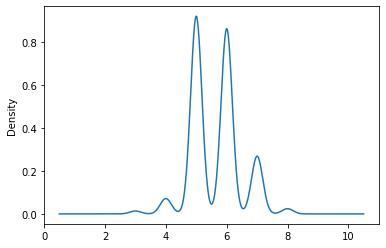

In [ ]:
wine_qr['quality'].plot(kind='density')

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
palette= sb.color_palette("rocket_r")

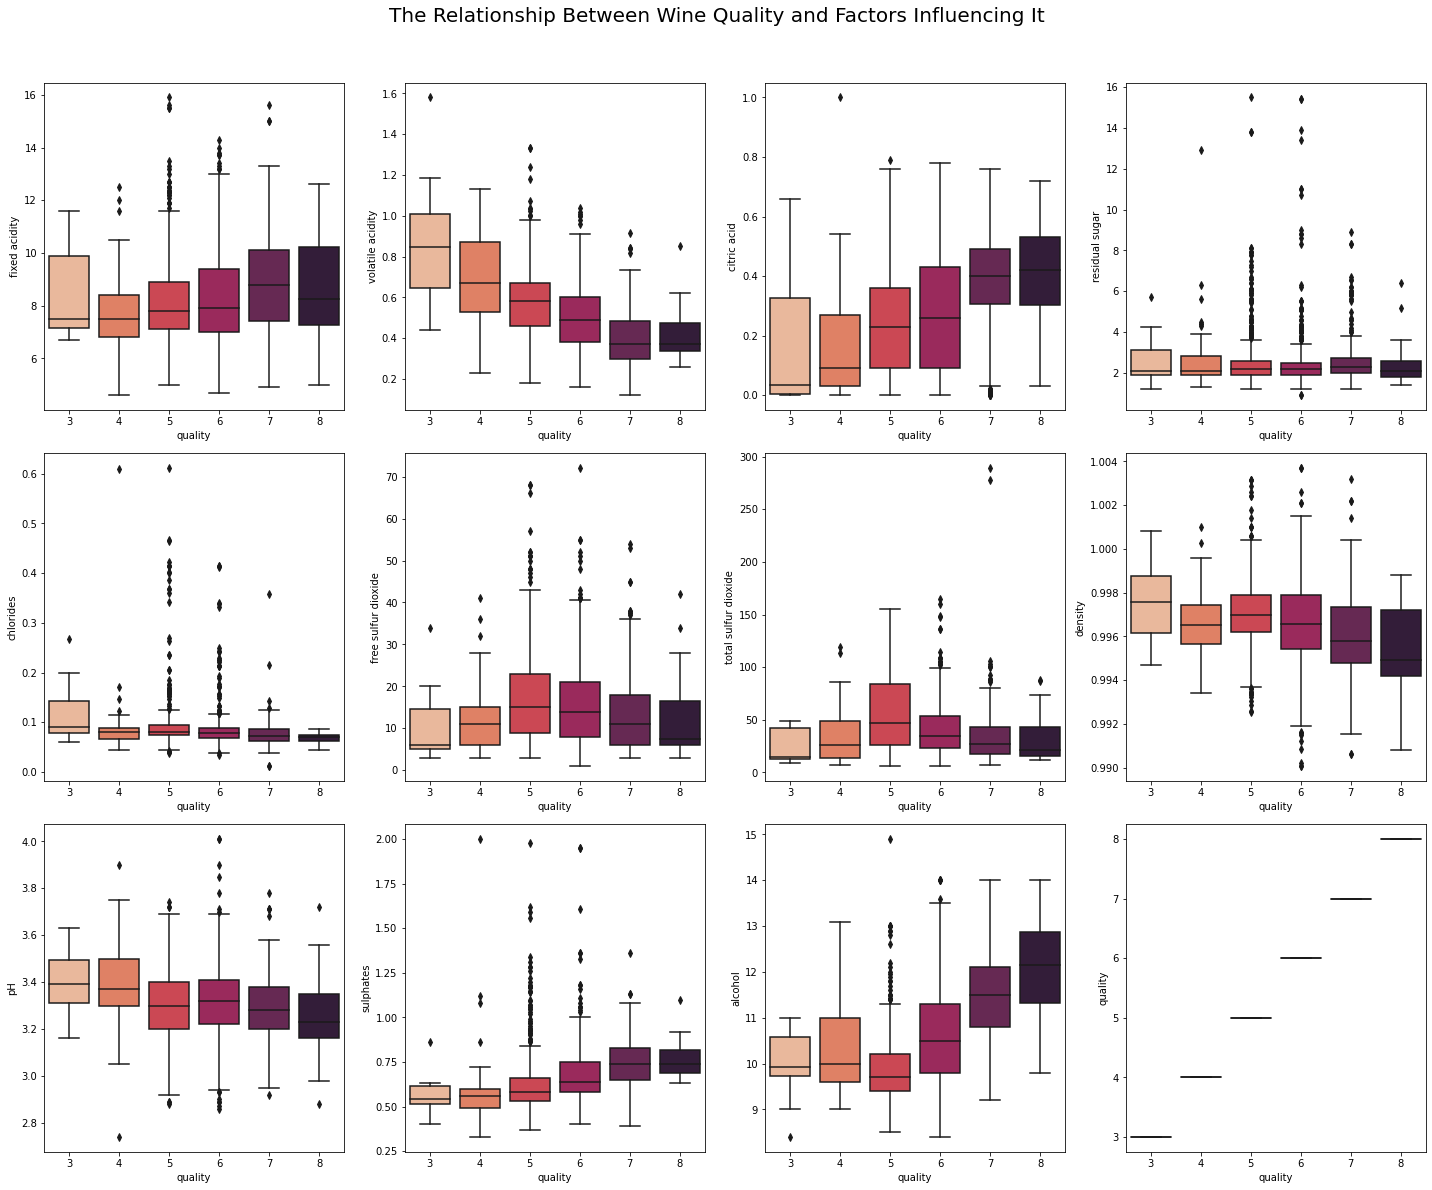

In [ ]:
fig , axs = plt.subplots(3,4 , figsize=(20,16))

for f , ax in zip(wine_qr.columns , axs.ravel()):
    sb.boxplot(data=wine_qr , x='quality' , y=f , ax=ax , palette=palette)
plt.suptitle('The Relationship Between Wine Quality and Factors Influencing It' , y=1.03 , size=20)
plt.tight_layout()

In [ ]:
palette1= sb.color_palette("magma")

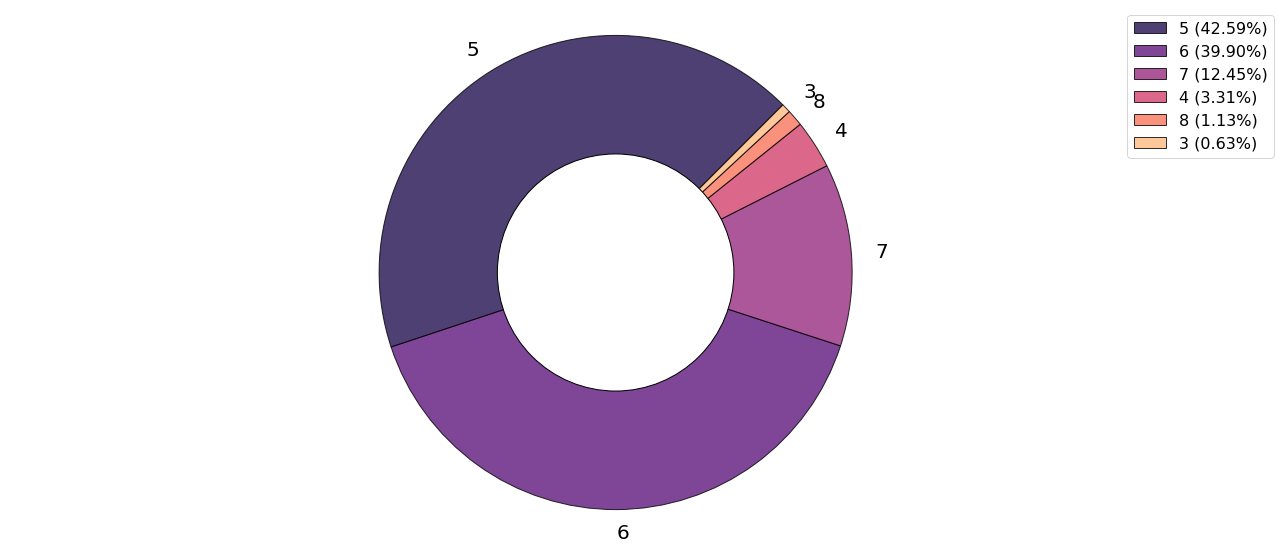

In [ ]:
target_count = wine_qr['quality'].value_counts()

fig, ax = plt.subplots(1 , figsize=(18, 8))

plt.pie(target_count , labels=target_count.index , startangle=45 , colors=palette1 , pctdistance=0.3,
       textprops={'fontsize': 20}, wedgeprops={'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 1} )
plt.axis('equal')  # Ensure the pie is drawn as a circle
# Add the legend with target values and percentage
legend_entries = [f'{label} ({count/len(wine_qr)*100:.2f}%)' for label, count in target_count.items()]
plt.legend(legend_entries, bbox_to_anchor=(1.05, 1), loc='best', fontsize=16)
# Draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor='black')
fig = plt.gcf()
# Adding circle in Pie chart
fig.gca().add_artist(centre_circle)
# Tighten the layout and show the figure
plt.tight_layout(pad=2)
plt.show()

In [ ]:
wine_qr.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


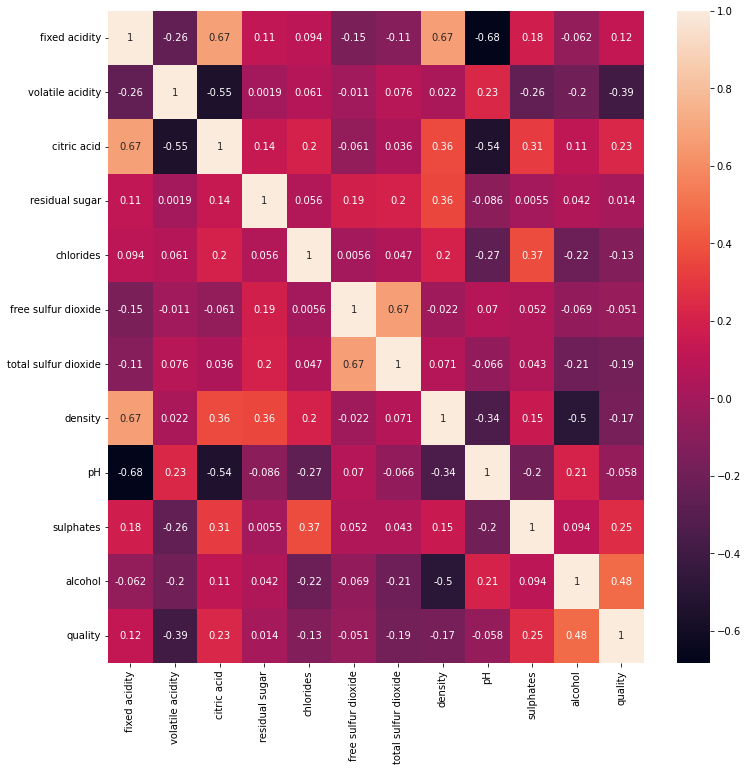

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(wine_qr.corr(), annot=True)
plt.show()

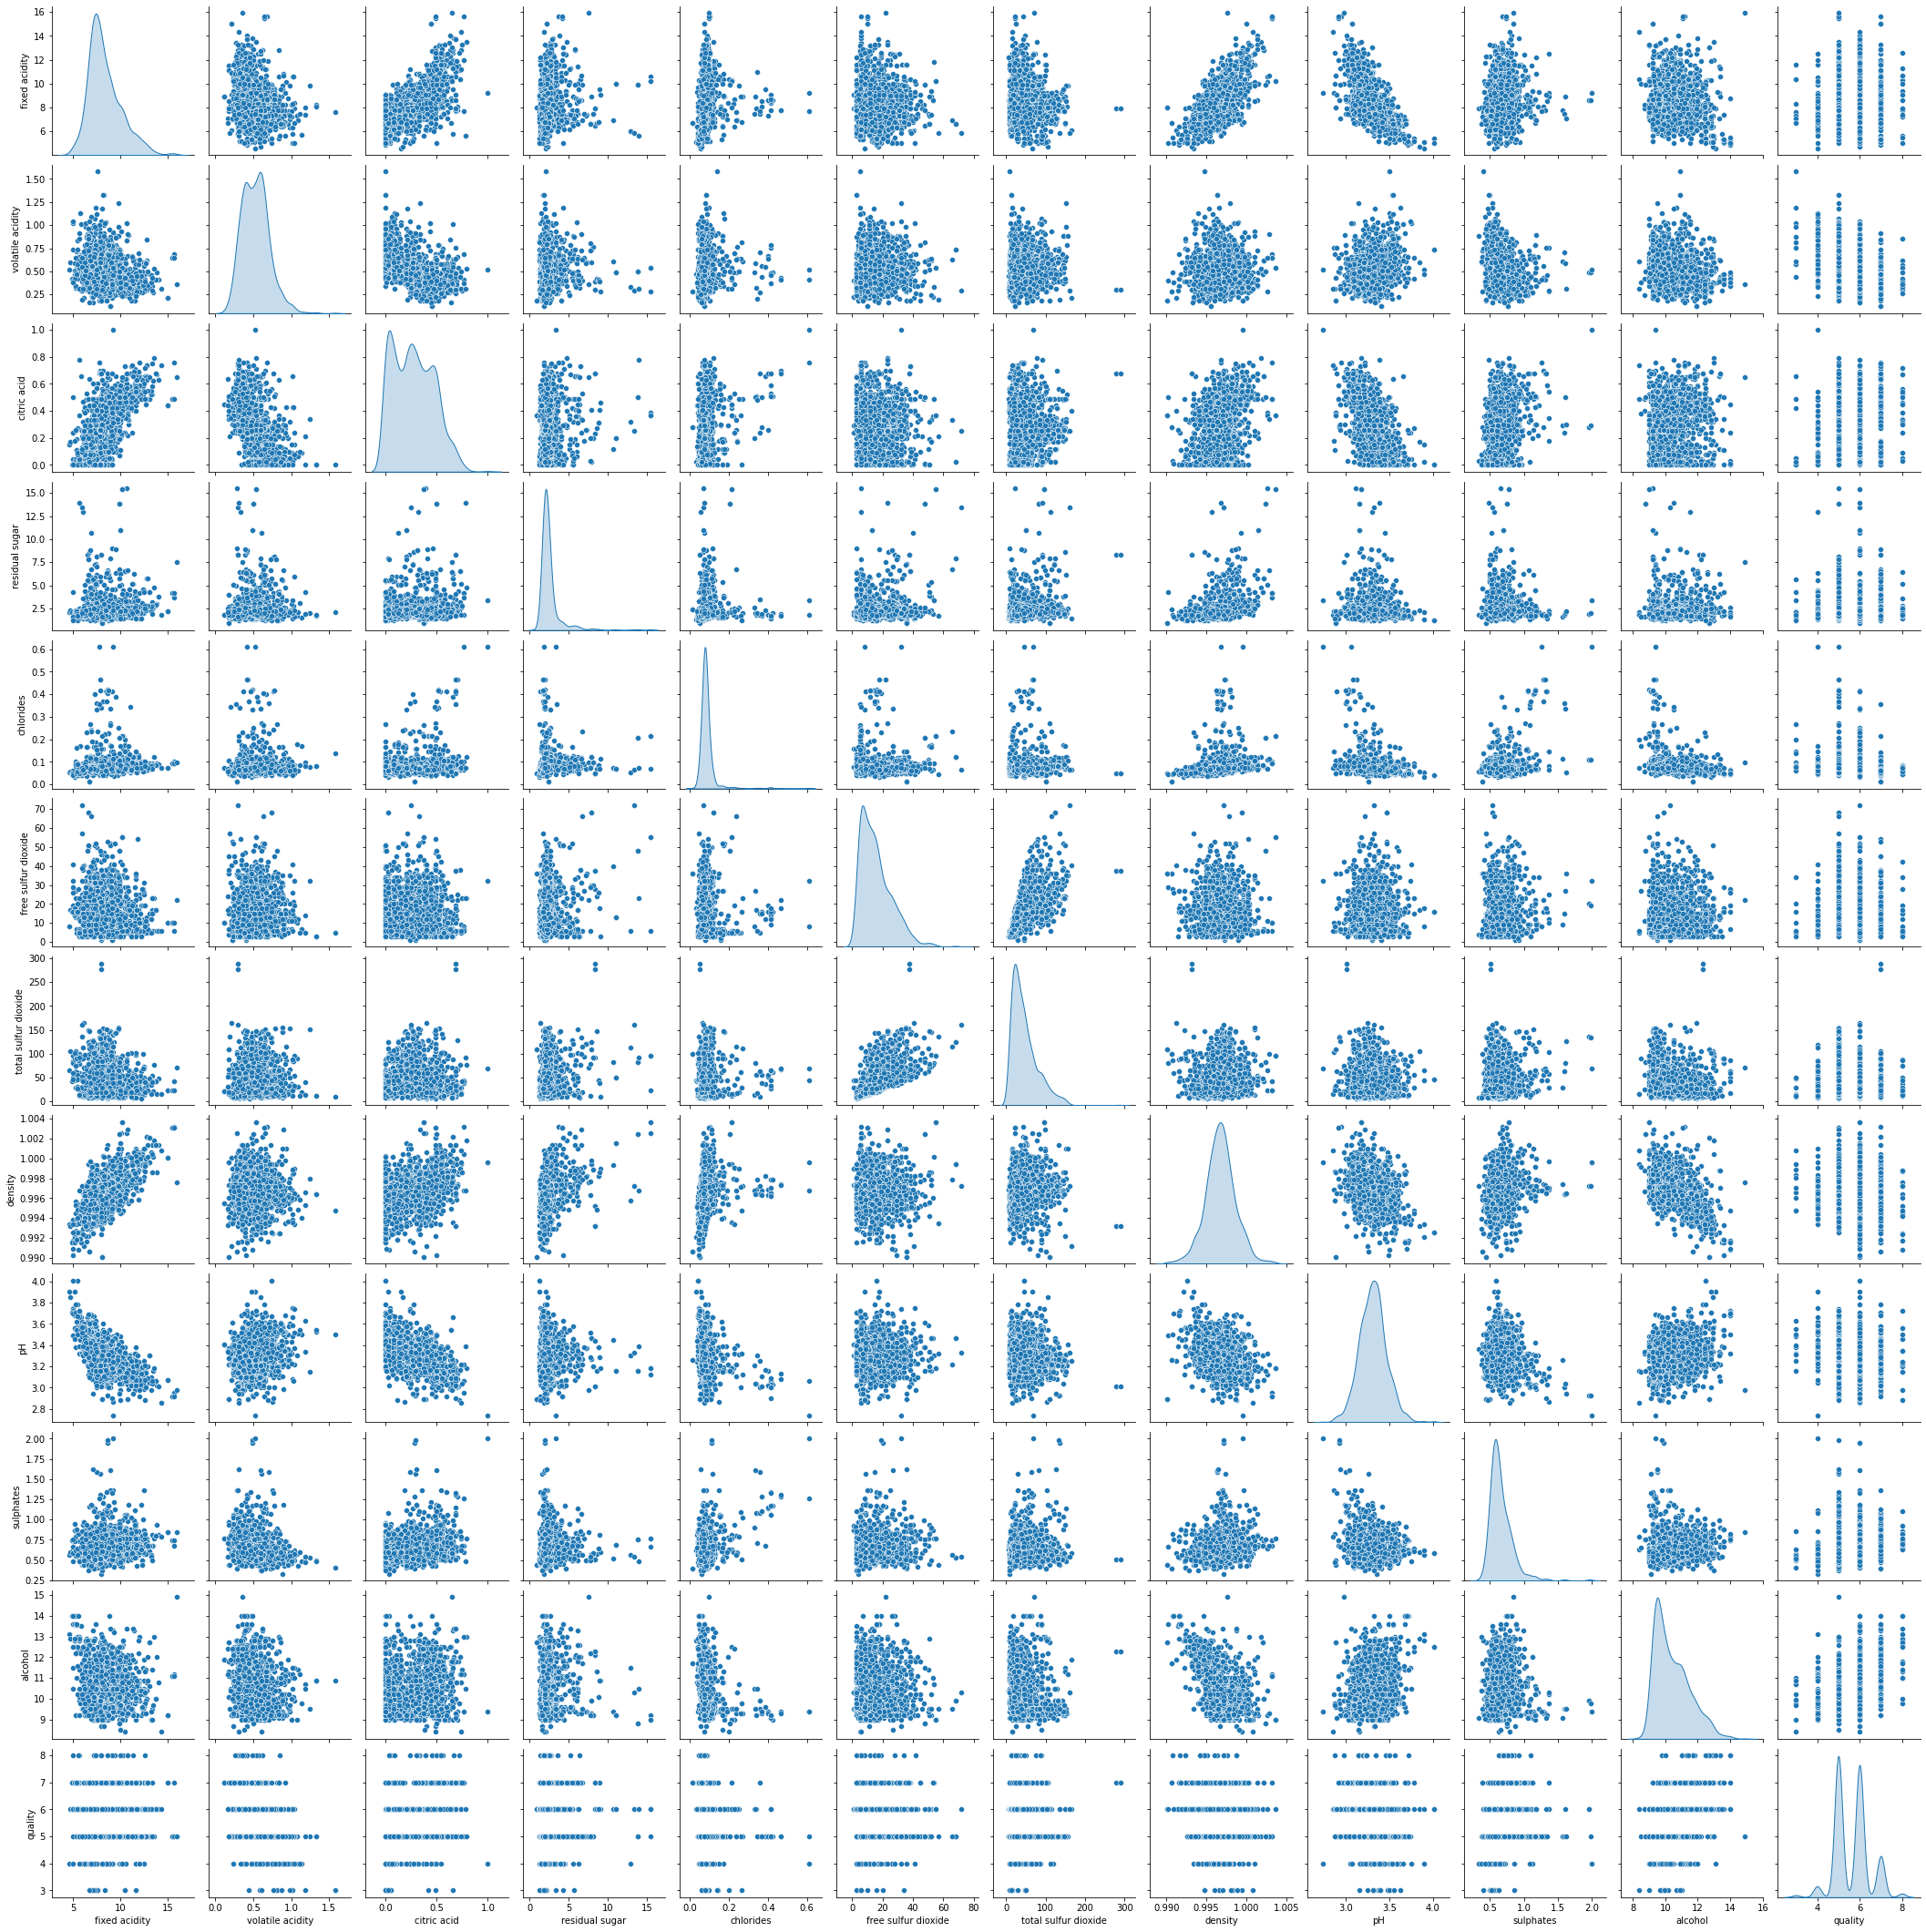

In [ ]:
sb.pairplot(wine_qr,diag_kind='kde')

FEATURE SELECTION

In [ ]:
# Create Classification version of target variable
wine_qr['goodquality'] = [1 if x >= 6 else 0 for x in wine_qr['quality']]
# Separate feature variables and target variable
X = wine_qr.drop(['quality','goodquality'], axis = 1)
Y = wine_qr['goodquality']

In [ ]:
# See proportion of good vs bad wines
wine_qr['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: goodquality, Length: 1599, dtype: int64


FEATURE IMPORTANCE

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_qr.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_qr)
model.fit(x, wine_qr.quality)
display(model.feature_importances_)

array([0.01706157, 0.03638869, 0.02067428, 0.02240597, 0.01890286,
       0.01608479, 0.02202362, 0.01945902, 0.02176301, 0.03127861,
       0.04477973, 0.72917784])

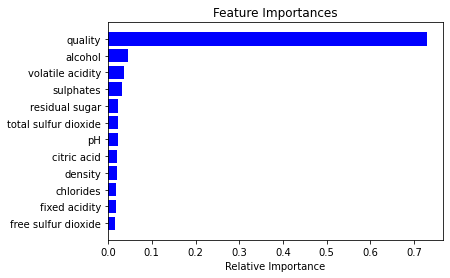

In [ ]:
features = wine_qr.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7375


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[144  68]
 [ 58 210]]


In [ ]:
from sklearn import metrics

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


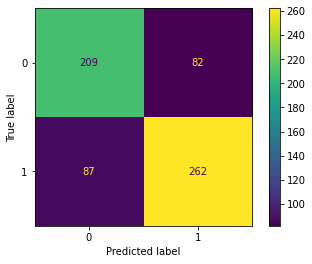

In [ ]:
metrics.plot_confusion_matrix(model, X_test, Y_test)
plt.show()

USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6770833333333334


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred)
print(confusion_mat)

[[135  77]
 [ 78 190]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


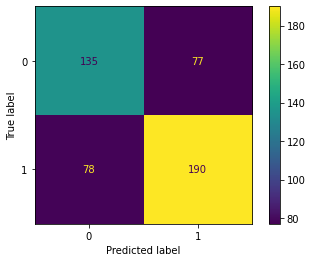

In [ ]:
metrics.plot_confusion_matrix(model, X_test, Y_test)
plt.show()

Using RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.8270833333333333


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)

[[167  45]
 [ 38 230]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


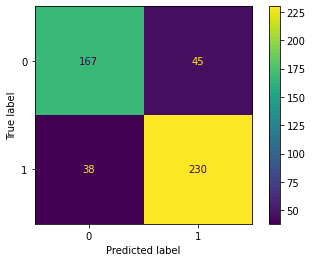

In [ ]:
metrics.plot_confusion_matrix(model2, X_test, Y_test)
plt.show()

Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6770833333333334


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)

[[146  66]
 [ 59 209]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


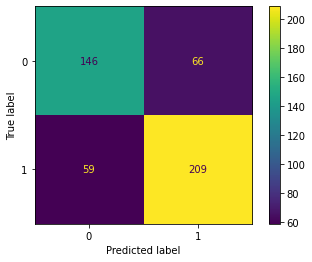

In [ ]:
metrics.plot_confusion_matrix(model3, X_test, Y_test)
plt.show()

Using Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test, y_pred4))

Accuracy Score: 0.7895833333333333


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)

[[154  58]
 [ 43 225]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


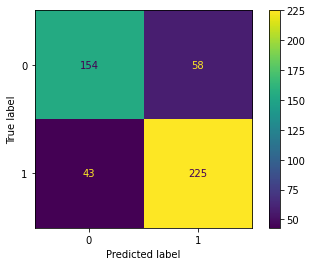

In [ ]:
metrics.plot_confusion_matrix(model4, X_test, Y_test)
plt.show()

Using SVC Classifier

In [ ]:
from sklearn.svm import SVC
model5 = SVC()
model5.fit(X_train,Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.6520833333333333


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred5)
print(confusion_mat)

[[ 81 131]
 [ 36 232]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


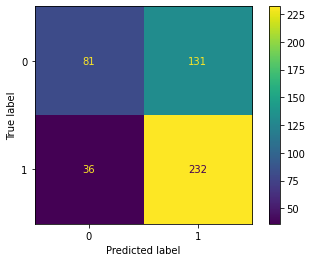

In [ ]:
metrics.plot_confusion_matrix(model5, X_test, Y_test)
plt.show()

Using Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model6 = BaggingClassifier()
model6.fit(X_train,Y_train)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred6))

Accuracy Score: 0.7833333333333333


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred6)
print(confusion_mat)

[[163  49]
 [ 55 213]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


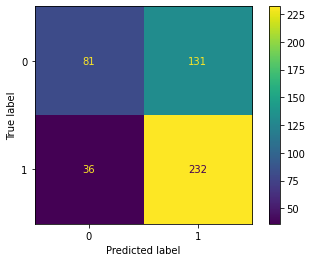

In [ ]:
metrics.plot_confusion_matrix(model5, X_test, Y_test)
plt.show()

Spilting data with different ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=7)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7359375


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[209  82]
 [ 87 262]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


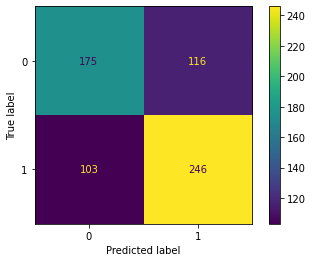

In [ ]:
metrics.plot_confusion_matrix(model, X_test, Y_test)
plt.show()

USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6578125


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred)
print(confusion_mat)

[[175 116]
 [103 246]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


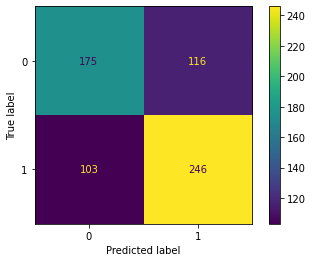

In [ ]:
metrics.plot_confusion_matrix(model, X_test, Y_test)
plt.show()

Using RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.80625


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)

[[229  62]
 [ 62 287]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


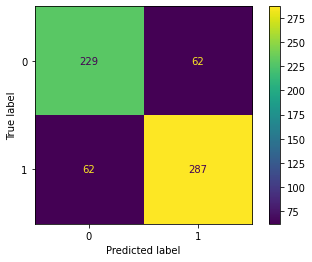

In [ ]:
metrics.plot_confusion_matrix(model2, X_test, Y_test)
plt.show()

Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6578125


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)

[[205  86]
 [ 76 273]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


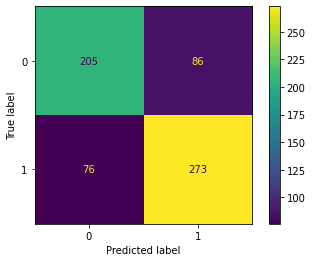

In [ ]:
metrics.plot_confusion_matrix(model3, X_test, Y_test)
plt.show()

Using Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test, y_pred4))

Accuracy Score: 0.7703125


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)

[[219  72]
 [ 75 274]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


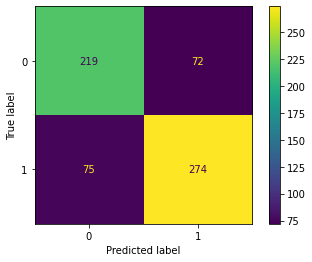

In [ ]:
metrics.plot_confusion_matrix(model4, X_test, Y_test)
plt.show()

Using SVC Classifier

In [ ]:
from sklearn.svm import SVC
model5 = SVC()
model5.fit(X_train,Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.6421875


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred5)
print(confusion_mat)

[[110 181]
 [ 48 301]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


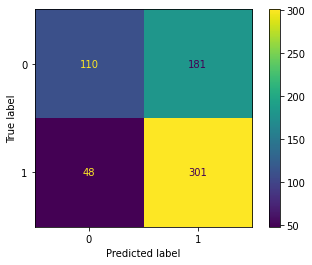

In [ ]:
metrics.plot_confusion_matrix(model5, X_test, Y_test)
plt.show()

Using Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model6 = BaggingClassifier()
model6.fit(X_train,Y_train)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred6))

Accuracy Score: 0.784375


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred6)
print(confusion_mat)

[[236  55]
 [ 83 266]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


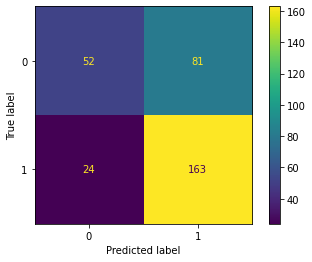

In [ ]:
metrics.plot_confusion_matrix(model5, X_test, Y_test)
plt.show()

Splitting Dataset with 80:20 Ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.734375


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[ 94  39]
 [ 46 141]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


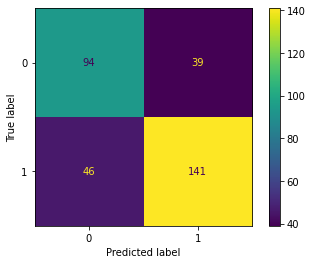

In [ ]:
metrics.plot_confusion_matrix(model, X_test, Y_test)
plt.show()

USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.68125


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred)
print(confusion_mat)

[[ 90  43]
 [ 59 128]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


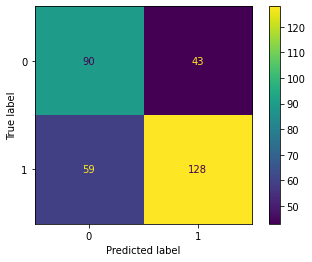

In [ ]:
metrics.plot_confusion_matrix(model, X_test, Y_test)
plt.show()

Using RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.84375


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)

[[110  23]
 [ 27 160]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


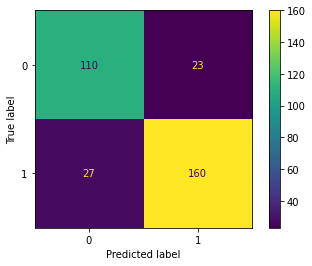

In [ ]:
metrics.plot_confusion_matrix(model2, X_test, Y_test)
plt.show()

Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.68125


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)


[[101  32]
 [ 36 151]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


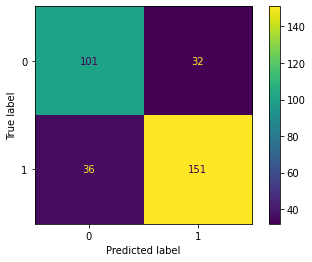

In [ ]:
metrics.plot_confusion_matrix(model3, X_test, Y_test)
plt.show()

Using Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test, y_pred4))

Accuracy Score: 0.7875


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)

[[101  32]
 [ 36 151]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


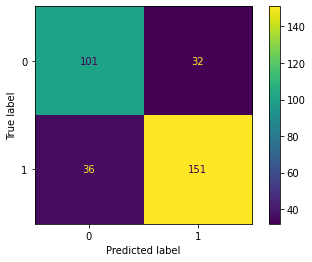

In [ ]:
metrics.plot_confusion_matrix(model4, X_test, Y_test)
plt.show()

Using SVC Classifier

In [ ]:
from sklearn.svm import SVC
model5 = SVC()
model5.fit(X_train,Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.671875


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred5)
print(confusion_mat)

[[ 52  81]
 [ 24 163]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


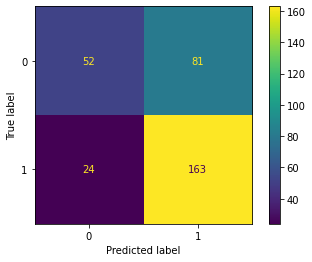

In [ ]:
metrics.plot_confusion_matrix(model5, X_test, Y_test)
plt.show()

Using Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model6 = BaggingClassifier()
model6.fit(X_train,Y_train)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred6))

Accuracy Score: 0.821875


In [ ]:
confusion_mat = confusion_matrix(Y_test,y_pred6)
print(confusion_mat)

[[114  19]
 [ 38 149]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


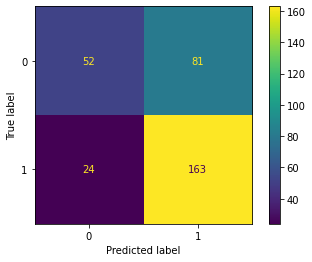

In [ ]:
metrics.plot_confusion_matrix(model5, X_test, Y_test)
plt.show()

NEURAL NETWORKS

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),#Adam or SGD
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fiting the model
history= model.fit(X_train, Y_train,epochs=1000)

Epoch 1/1000
40/40 [==============================] - 3s 9ms/step - loss: 0.9330 - accuracy: 0.5598 - precision: 0.5949 - a=recall: 0.4925
Epoch 2/1000
40/40 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5692 - precision: 0.6085 - a=recall: 0.4910
Epoch 3/1000
40/40 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.5927 - precision: 0.6154 - a=recall: 0.5868
Epoch 4/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.5754 - precision: 0.6218 - a=recall: 0.4775
Epoch 5/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.6691 - accuracy: 0.5958 - precision: 0.6122 - a=recall: 0.6168
Epoch 6/1000
40/40 [==============================] - 0s 9ms/step - loss: 0.6807 - accuracy: 0.5504 - precision: 0.6247 - a=recall: 0.3488
Epoch 7/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.6715 - accuracy: 0.5684 - precision: 0.6324 - a=recall: 0.4147
Epoch 8/1000
40/40 [=======

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'a=recall'])


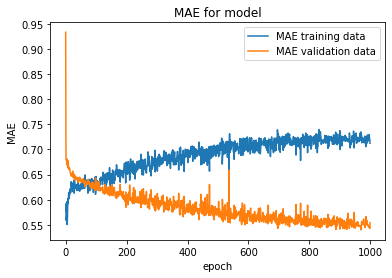

In [ ]:
plt.plot(history.history['accuracy'], label='MAE training data')
plt.plot(history.history['loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

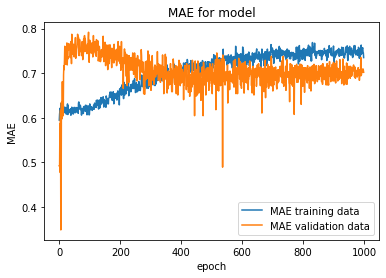

In [ ]:
plt.plot(history.history['precision'], label='MAE training data')
plt.plot(history.history['a=recall'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()